In [1]:
import os
os.getcwd()
os.chdir('/home/chtung/project_MC')

import numpy as np
import time
from tqdm import tqdm, trange
from WLM import WLChain
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat

<Figure size 1152x1152 with 0 Axes>

In [2]:
## Chain parameters
# Coordinate of C atoms in each unit
# unit_C = load('b_c.dat')';
unit_C = np.zeros((3,1))

# Degree of polymerization
N_backbone = 5000

# Chain stiffness (placeholder)
a_backbone = 1

# Unit persistence
lambda_backbone = 1

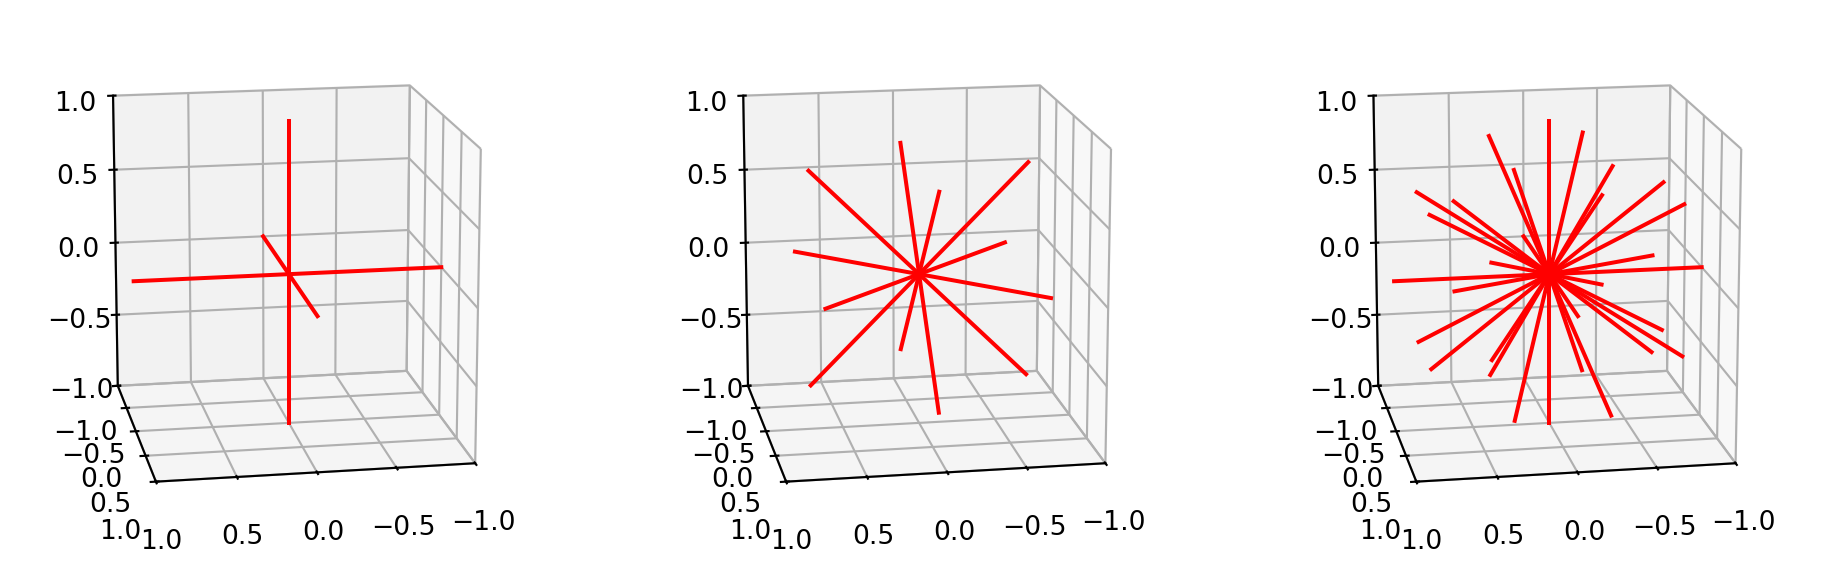

In [4]:
from f_chain import grid_coords

fig = plt.figure(figsize=(12, 4),dpi=192)

for i, grid in enumerate(['SC','RB','RT']):
    ax = fig.add_subplot(1,3,i+1, projection='3d')
    ax.view_init(15,80)
    ax.set_aspect('equal')

    r_n, r_opp = grid_coords(grid)
    cos_ij = r_n@r_n.T

    for j in range(len(r_n)):
        ax.plot([0, r_n[j][0]],[0, r_n[j][1]],[0, r_n[j][2]], 'r')  

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])



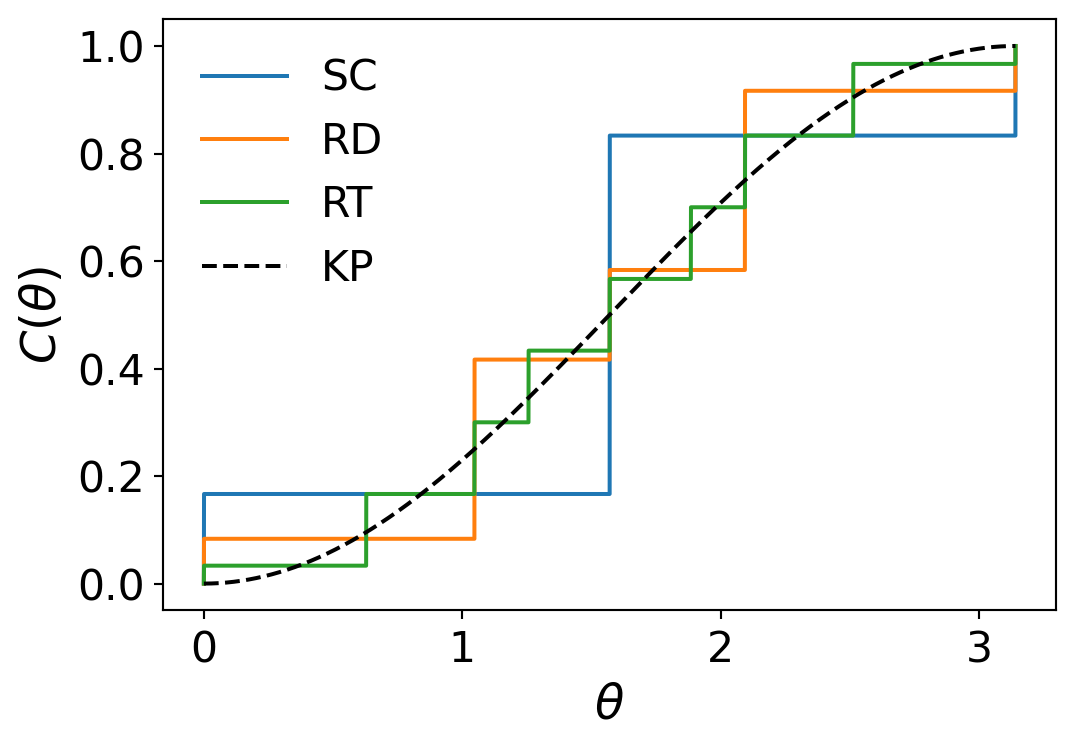

In [5]:
from f_chain import grid_coords

fig = plt.figure(figsize=(6, 4),dpi=192)
ax = fig.add_subplot(1,1,1)
labels = ['SC','RD','RT']
for i, grid in enumerate(['SC','RB','RT']):

    r_n, r_opp = grid_coords(grid)
    cos_ij = r_n@r_n.T
    cos_ij_f = cos_ij.flatten()
    theta_ij_f = np.arccos(cos_ij_f)

    bins = np.linspace(0,np.pi,10000)
    counts, bins = np.histogram(theta_ij_f,bins)
    counts = np.hstack([0,counts])
    cum_counts = np.cumsum(counts)/np.sum(counts)
    ax.plot(bins,cum_counts, label = labels[i])
 
sine = np.sin(bins)
cum_sine = np.cumsum(sine)/np.sum(sine)
ax.plot(bins,cum_sine, '--k', label = 'KP')

ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel(r'$C(\theta)$',fontsize=18)
ax.legend(fontsize=16, frameon=False)
ax.tick_params(axis='both', which='major', labelsize=16)
